In [83]:
import numpy as np
from number_gen import numberGen
import matplotlib.pyplot as plt

In [84]:
def invcdf(u):
    a = 1/57
    return np.sqrt(((-2)/(a**2)) * np.log(1-u))

In [85]:
estimates = 550
sMn = [3, 9, 27, 81]

In [86]:
ng = numberGen()
samples = []
for n in sMn:
    meanSamp = []
    for i in range(estimates):
        sum = 0
        for k in range(n):
            sum+=invcdf(ng.getNext())
            
        meanSamp.append(sum/n)    
    samples.append(meanSamp)


In [87]:
means = []
variances = []
def sumList(list):
    s = 0
    for i in range(len(list)):
        s+=list[i]
    return s

for i in range(len(samples)):
    toAppend = (1/estimates) * sumList(samples[i])
    means.append(toAppend)

for i in range(len(sMn)):
    sum = 0
    for m in samples[i]:
        sum += ((m**2) - (means[i]**2))
    variances.append((sum/estimates))

stdevs = [np.sqrt(var) for var in variances]
print(means)
print(variances)
print(stdevs)

[71.64040758258697, 70.75991146855603, 71.40423894532934, 71.27256431876613]
[450.4022393611108, 160.12384314907075, 53.3560010588929, 18.382628016578522]
[21.222682190550533, 12.654005024065336, 7.30451922161157, 4.287496707471449]


In [88]:
zSamples = []
for i in range(len(samples)):
    zSample = [(m - means[i])/stdevs[i] for m in samples[i]]
    zSamples.append(zSample)

In [89]:
events = [-1.4, -1, -0.5, 0, 0.5, 1, 1.4]
standCDFs = []
npZSamples = np.asarray(zSamples)

for nSample in npZSamples:
    standCDF = []
    for event in events:
        standCDF.append(len(np.extract(nSample <= event, nSample))/len(nSample))
    standCDFs.append(standCDF)

print(standCDFs)

[[0.06909090909090909, 0.1618181818181818, 0.3290909090909091, 0.5181818181818182, 0.6909090909090909, 0.8436363636363636, 0.9], [0.08181818181818182, 0.16, 0.3090909090909091, 0.49818181818181817, 0.6945454545454546, 0.8418181818181818, 0.9090909090909091], [0.07272727272727272, 0.13818181818181818, 0.3054545454545455, 0.509090909090909, 0.7, 0.86, 0.9327272727272727], [0.08363636363636363, 0.1618181818181818, 0.2963636363636364, 0.5018181818181818, 0.7, 0.8563636363636363, 0.9218181818181819]]


In [90]:
import scipy.stats as ss

In [91]:
eventsCDF = ss.norm.cdf(events)
print(eventsCDF)
absoluteDiffs = []
for n in standCDFs:
    absoluteDiffs.append(np.abs(eventsCDF - n))

mADs = []
for list in absoluteDiffs:
    mADs.append(max(list))
print(absoluteDiffs)
print(mADs)

[0.08075666 0.15865525 0.30853754 0.5        0.69146246 0.84134475
 0.91924334]
[array([0.01166575, 0.00316293, 0.02055337, 0.01818182, 0.00055337,
       0.00229162, 0.01924334]), array([0.00106152, 0.00134475, 0.00055337, 0.00181818, 0.00308299,
       0.00047344, 0.01015243]), array([0.00802939, 0.02047344, 0.00308299, 0.00909091, 0.00853754,
       0.01865525, 0.01348393]), array([0.0028797 , 0.00316293, 0.0121739 , 0.00181818, 0.00853754,
       0.01501889, 0.00257484])]
[0.02055337036492222, 0.010152431675319873, 0.02047343574963889, 0.015018890295093401]


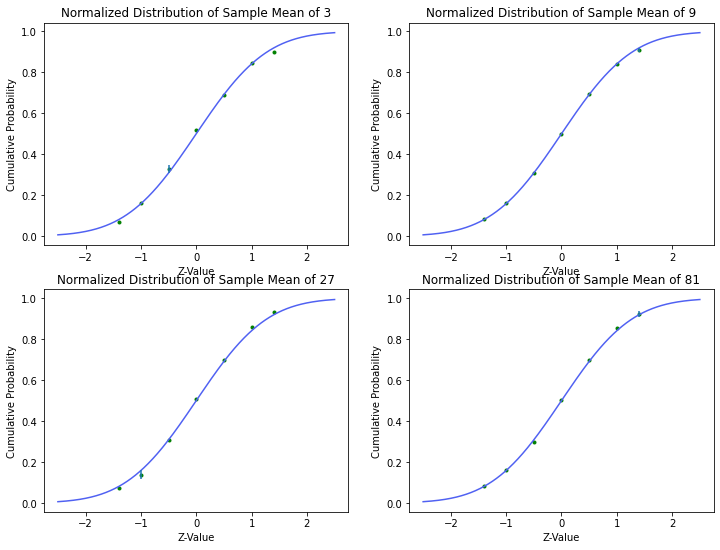

In [92]:
normX = np.linspace(-2.5, 2.5, 1000)
normY = ss.norm.cdf(normX)

plt.figure(figsize = (12, 9))
plt.subplot(2, 2, 1)
plt.plot(normX, normY, color = "#5061F2")
for i in range(len(events)):
    plt.scatter(events[i], standCDFs[0][i], color = "green", marker = '.')
plt.errorbar(events[2], standCDFs[0][2], yerr = mADs[0])
plt.ylabel("Cumulative Probability")
plt.xlabel("Z-Value")
plt.title("Normalized Distribution of Sample Mean of 3")

plt.subplot(2, 2, 2)
plt.plot(normX, normY, color = "#5061F2")
for i in range(len(events)):
    plt.scatter(events[i], standCDFs[1][i], color = "green", marker = '.')
plt.errorbar(events[6], standCDFs[1][6], yerr = mADs[1])
plt.ylabel("Cumulative Probability")
plt.xlabel("Z-Value")
plt.title("Normalized Distribution of Sample Mean of 9")

plt.subplot(2, 2, 3)
plt.plot(normX, normY, color = "#5061F2")
for i in range(len(events)):
    plt.scatter(events[i], standCDFs[2][i], color = "green", marker = '.')
plt.errorbar(events[1], standCDFs[2][1], yerr = mADs[2])
plt.ylabel("Cumulative Probability")
plt.xlabel("Z-Value")
plt.title("Normalized Distribution of Sample Mean of 27")

plt.subplot(2, 2, 4)
plt.plot(normX, normY, color = "#5061F2")
for i in range(len(events)):
    plt.scatter(events[i], standCDFs[3][i], color = "green", marker = '.')
plt.errorbar(events[6], standCDFs[3][6], yerr = mADs[3])
plt.ylabel("Cumulative Probability")
plt.xlabel("Z-Value")
plt.title("Normalized Distribution of Sample Mean of 81")
plt.savefig('./figures/Normalized-CDFs')